In [4]:
# Jupyter notebook "magic"
%matplotlib inline

In [3]:
import os
import json
from skimage import io
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
os.chdir("E:\M596 Project")

base_directory = os.getcwd()

data_directory = os.path.join(base_directory, 'Data Set')
data_0 = os.path.join(data_directory, '0')
data_1 = os.path.join(data_directory, '1')
data_2 = os.path.join(data_directory, '2')
data_3 = os.path.join(data_directory, '3')
data_4 = os.path.join(data_directory, '4')

# Check image size distribution

In [5]:
def batch_image_list_builder(directory, batch_size=32):
    """
    Generator that builds a list of images batch by batch.

    parameter:
    - directory: Path to the directory containing the image.
    - batch_size: The number of images loaded in each batch.

    return:
    The generator generates a list containing batch_size images and the corresponding file name list each time.
    """
    image_list = []
    filenames = []
    # iterate over files in that directory
    for root, dirs, files in os.walk(directory):
        for filename in files:
            if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')):
                file_path = os.path.join(root, filename)
                image_list.append(io.imread(file_path))
                filenames.append(filename)

                if len(image_list) == batch_size:
                    yield image_list, filenames
                    image_list = []
                    filenames = []

    # yield the remaining images if any
    if image_list:
        yield image_list, filenames


In [6]:
def image_shape_trend(directory, batch_size=32, target_width=None, Type='Trend'):
    """
    Plot trends in image shapes and print images that appear to have unconventional widths.

    Parameters:
    - directory: Path to the directory containing the images.
    - batch_size: The number of images loaded in each batch.
    - target_width: Target width used to detect images with unconventional widths.
    - Type: Type of image display, 'Trend' or 'Outliers'.

    Returns:
    No return value, but image shape trend charts or information about images with non-conventional widths will be displayed.
    """
    image_generator = batch_image_list_builder(directory, batch_size)

    shapes = []  # List to store image shapes
    inconsistent_width_images = []  # List to store images with unconventional widths

    for batch_images, batch_filenames in image_generator:
        for idx, image in enumerate(batch_images):
            # Get the shape of the image (height, width, channels)
            shape = image.shape
            shapes.append(shape)

            # Check for images with unconventional widths
            if target_width is not None and shape[1] != target_width:
                inconsistent_width_images.append((batch_filenames[idx], shape, image))

    # Convert to a NumPy array for plotting
    shapes_array = np.array(shapes)
    
    if Type == 'Trend':
        # Plot trends in image shapes
        plt.figure(figsize=(12, 6))
    
        plt.subplot(3, 1, 1)
        plt.plot(shapes_array[:, 0], label='Height')
        plt.title('Image Height Trend')
        plt.xlabel('Image Index')
        plt.ylabel('Height')
    
        plt.subplot(3, 1, 2)
        plt.plot(shapes_array[:, 1], label='Width')
        plt.title('Image Width Trend')
        plt.xlabel('Image Index')
        plt.ylabel('Width')
    
        plt.subplot(3, 1, 3)
        plt.plot(shapes_array[:, 2], label='Channels')
        plt.title('Image Channels Trend')
        plt.xlabel('Image Index')
        plt.ylabel('Channels')
    
        plt.tight_layout()
        plt.show()
        
    if Type == 'Outliers':
        # Display information about images with unconventional widths
        if inconsistent_width_images:
            print("Images with inconsistent width:")
            num_images = len(inconsistent_width_images)
            num_rows = (num_images + 2) // 3  # Calculate the required number of rows
            total_height = num_rows * 5  # Each row height is 5 inches
            plt.figure(figsize=(15, total_height))  # Set the overall size of the figure
    
            gs = gridspec.GridSpec(num_rows, 3, wspace=0.5, hspace=0.5)  # Create a grid
    
            for i, (filename, shape, img) in enumerate(inconsistent_width_images):
                ax = plt.subplot(gs[i // 3, i % 3])  # Keep the default subplot size
                ax.imshow(img)
                ax.set_title(f"File: {filename}\nWidth: {shape}")
                ax.axis('off')
                ax.set_aspect('equal')  # Set the aspect ratio of the subplot to 1:1
    
            plt.show()


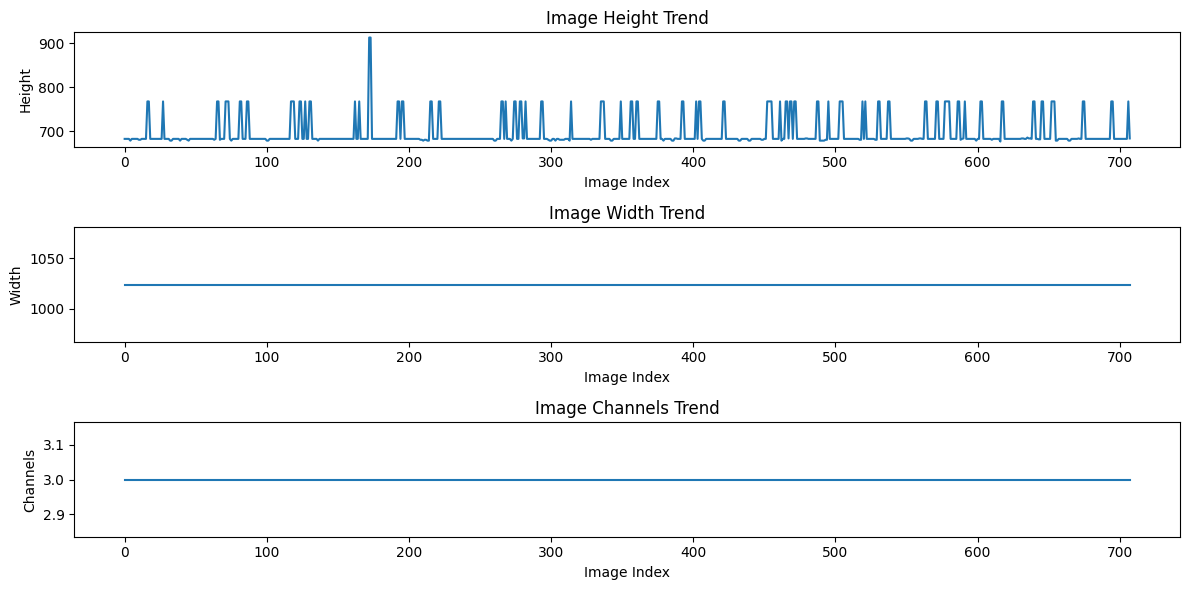

In [27]:
image_shape_trend(data_4)

We can see that for database 4, the number of color channels and width of all images remain consistent, but the height fluctuates.

In [57]:
image_shape_trend(data_4, target_width=1024,Type='Outliers')

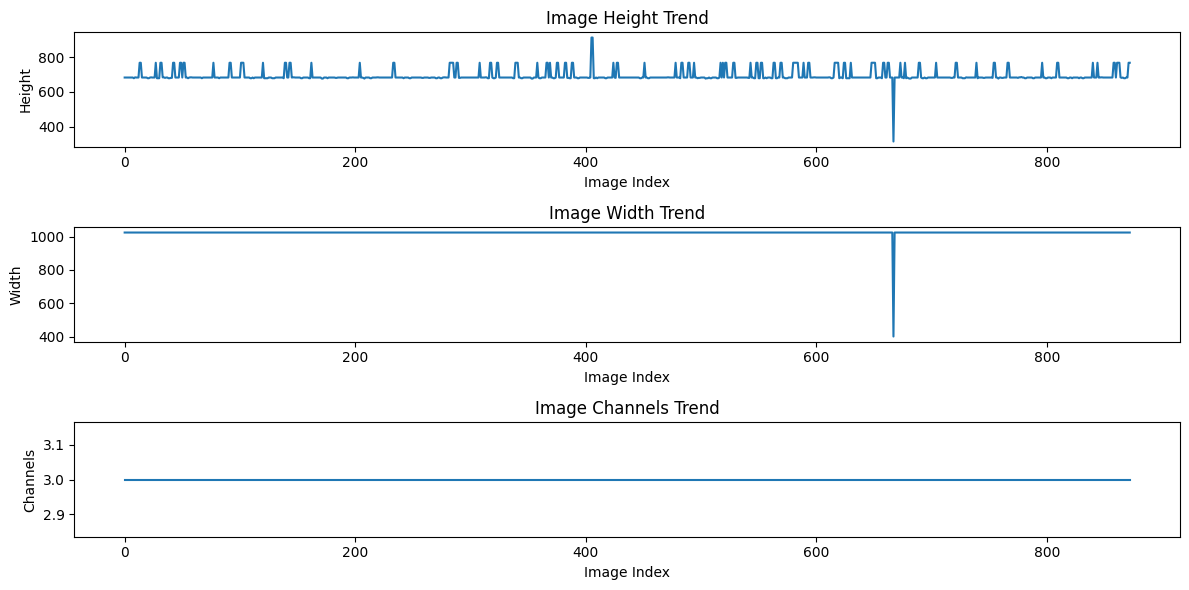

In [40]:
image_shape_trend(data_3)

We can see that for database 3, the number of color channels and width of all images remain basically the same, but the height fluctuates. There seems to be an outlier.

Images with inconsistent width:


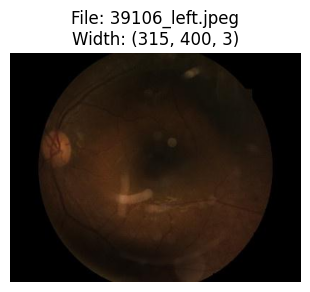

In [65]:
image_shape_trend(data_3, target_width=1024,Type='Outliers')

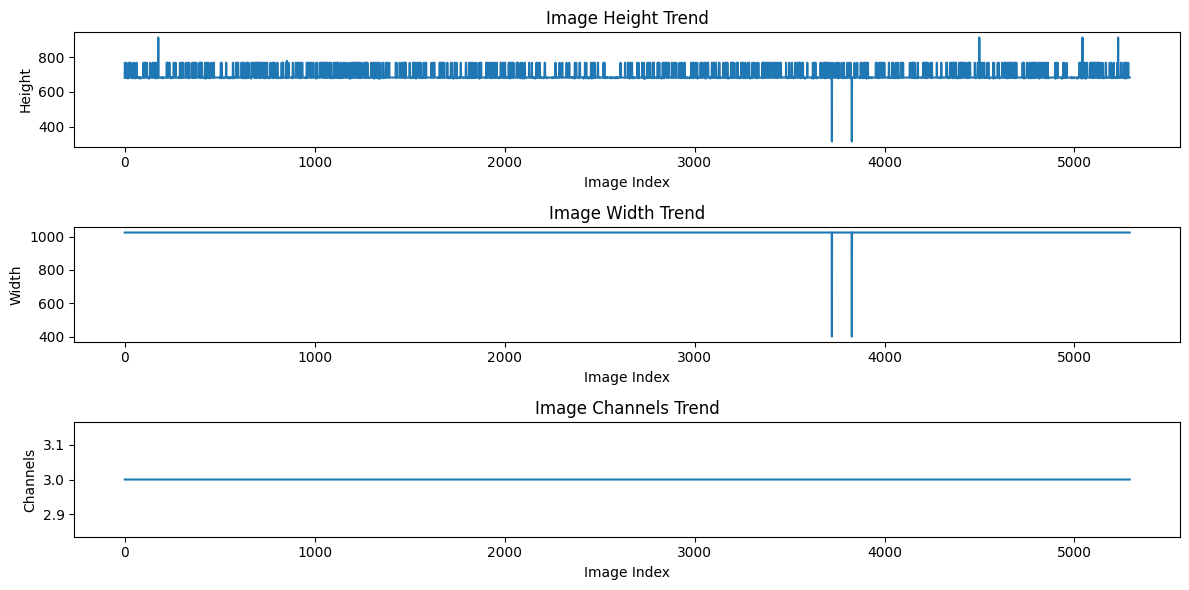

In [41]:
image_shape_trend(data_2)

We can see that for database 2, the number of color channels and width of all images remain basically the same, but the height fluctuates. There seem to be 2 outliers.

Images with inconsistent width:


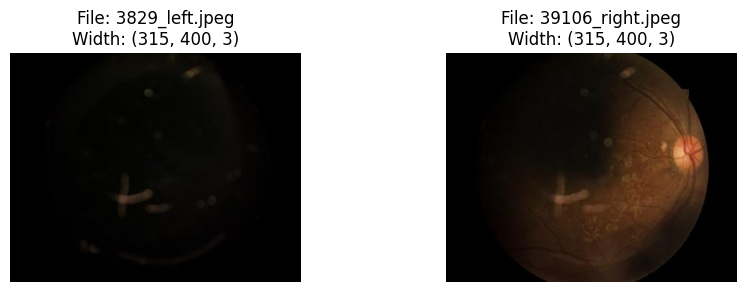

In [66]:
image_shape_trend(data_2, target_width=1024,Type='Outliers')

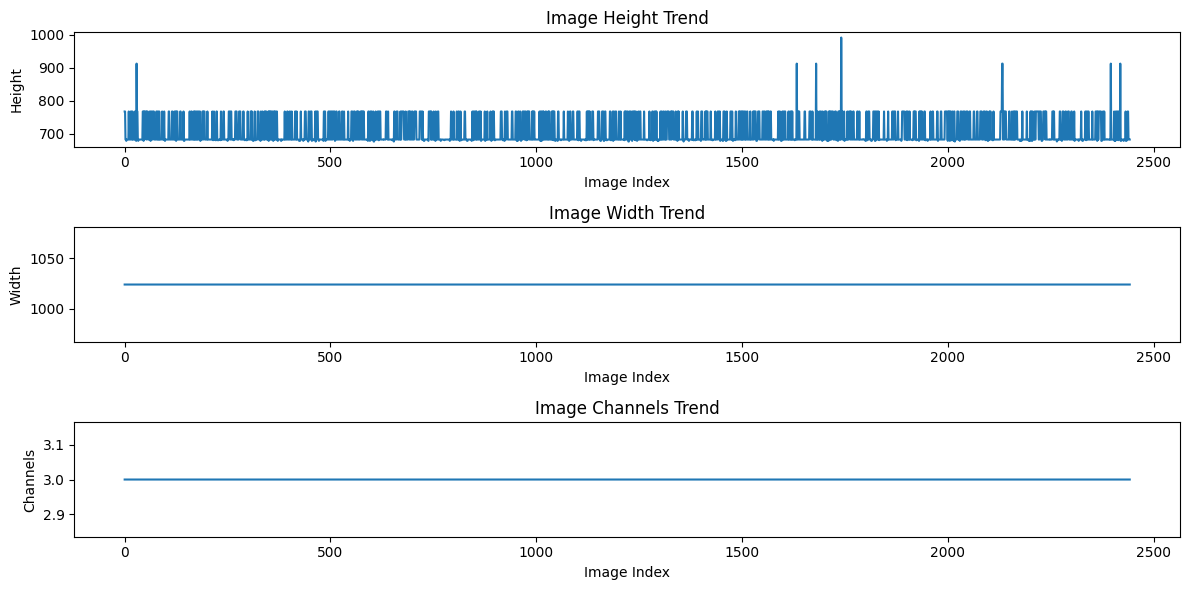

In [42]:
image_shape_trend(data_1)

We can see that for database 1, the number of color channels and width of all images remain consistent, but the height fluctuates.

In [67]:
image_shape_trend(data_1, target_width=1024,Type='Outliers')

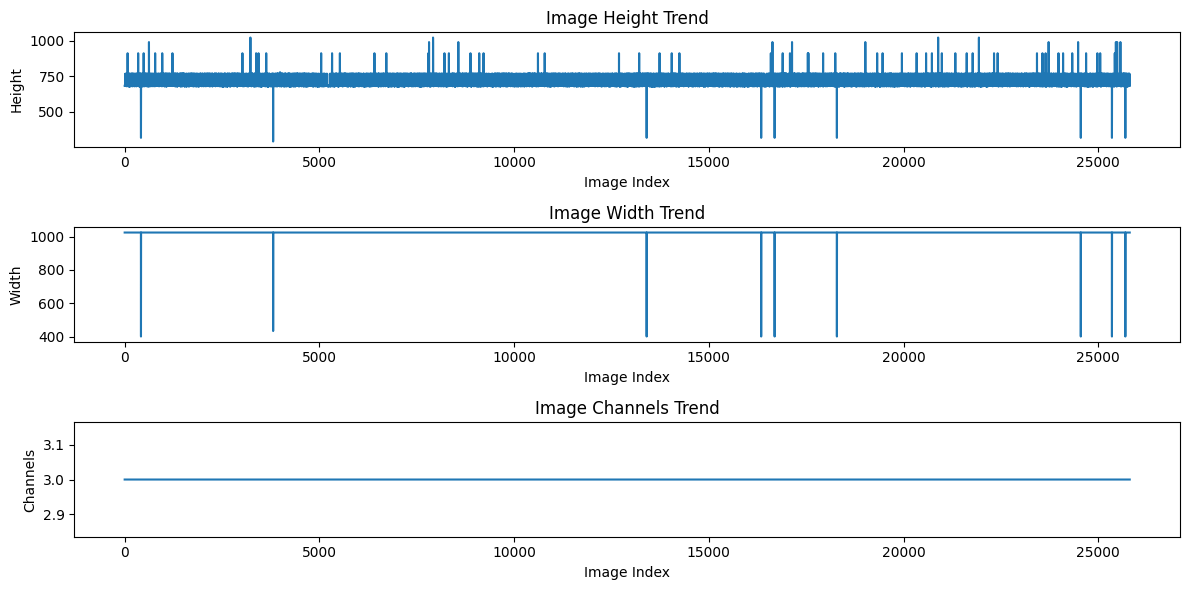

In [43]:
image_shape_trend(data_0)

We can see that for database 2, the number of color channels and width of all images remain basically the same, but the height fluctuates. There seem to be multiple outliers.

Images with inconsistent width:


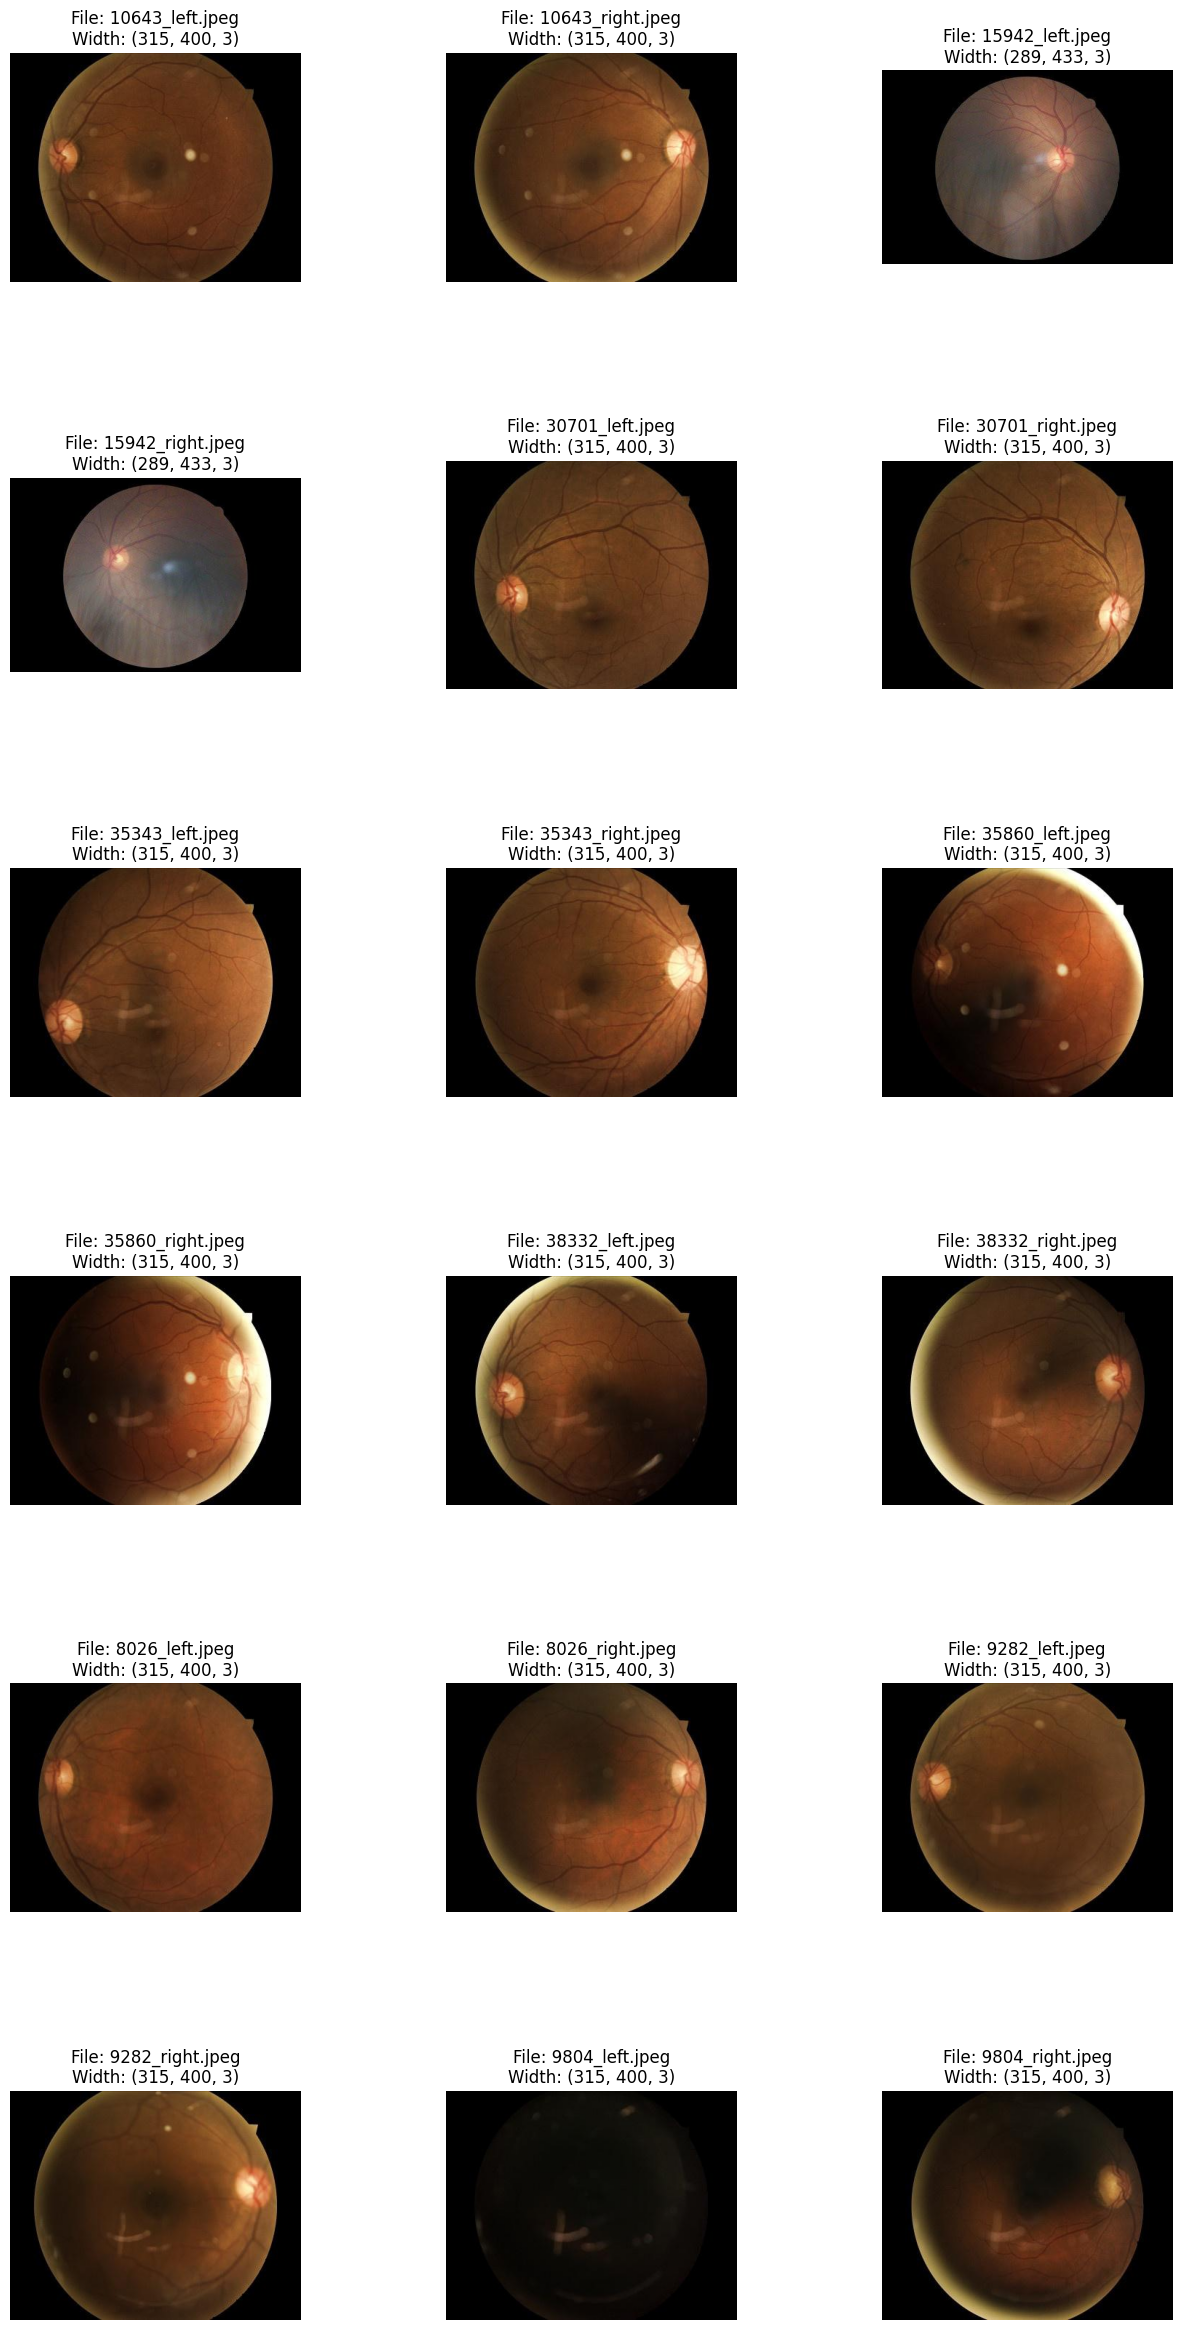

In [68]:
image_shape_trend(data_0, target_width=1024,Type='Outliers')

Before I thought that the abnormal image size meant that the image could not be used, after checking, I found that it was just a size problem, and I also needed a way to find the non-conforming images.

In [7]:
def resize_and_save_with_generator(directory, output_directory, batch_size=32, target_size=(340, 510)):
    """
    Use ImageDataGenerator for proportional scaling, resizing, and saving images.

    Parameters:
    - directory: Path to the directory containing images.
    - output_directory: Path to the target directory to save resized images.
    - batch_size: Number of images loaded in each batch.
    - target_size: Target size in the format (height, width).
    """
    image_datagen = ImageDataGenerator(rescale=1/255.)  # Normalize the images

    image_generator = image_datagen.flow_from_directory(
        directory,
        target_size=target_size,
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False
    )

    for i, (batch, labels) in enumerate(image_generator):
        for j, (image, label, filename) in enumerate(zip(batch, labels, image_generator.filenames[i * batch_size:(i + 1) * batch_size])):
            
            # Extract the filename from the original file path
            original_filename = os.path.basename(filename)

            # Build a new filename, including the label and the original filename
            new_filename = f"{np.argmax(label)}_{original_filename}"
            
            # Convert the float-type image to 8-bit unsigned integer type
            image_uint8 = (image * 255).astype(np.uint8)

            # Save the image to the target folder with the new filename
            output_path = os.path.join(output_directory, new_filename)
            io.imsave(output_path, image_uint8)


Use ImageDataGenerator to rescale images in batches to unify pixels, and regenerate the data set from the generated data.

In [8]:
data_directory_reshaped = os.path.join(data_directory, 'Reshaped Data')

In [32]:
# Resize and save the image using ImageDataGenerator
resize_and_save_with_generator(data_directory, data_directory_reshaped)

Found 35126 images belonging to 7 classes.


C:\Users\Qu Dachen\AppData\Local\Temp\ipykernel_1812\4228692058.py:35: UserWarning: E:\M596 Project\Data Set\Reshaped Data\1_10464_left.jpeg is a low contrast image
  io.imsave(output_path, image_uint8)
C:\Users\Qu Dachen\AppData\Local\Temp\ipykernel_1812\4228692058.py:35: UserWarning: E:\M596 Project\Data Set\Reshaped Data\1_10996_left.jpeg is a low contrast image
  io.imsave(output_path, image_uint8)
C:\Users\Qu Dachen\AppData\Local\Temp\ipykernel_1812\4228692058.py:35: UserWarning: E:\M596 Project\Data Set\Reshaped Data\1_1557_left.jpeg is a low contrast image
  io.imsave(output_path, image_uint8)
C:\Users\Qu Dachen\AppData\Local\Temp\ipykernel_1812\4228692058.py:35: UserWarning: E:\M596 Project\Data Set\Reshaped Data\1_1986_left.jpeg is a low contrast image
  io.imsave(output_path, image_uint8)
C:\Users\Qu Dachen\AppData\Local\Temp\ipykernel_1812\4228692058.py:35: UserWarning: E:\M596 Project\Data Set\Reshaped Data\1_21118_left.jpeg is a low contrast image
  io.imsave(output_path, 

KeyboardInterrupt: 

# Initial acquisition of original data parameters

In [9]:
def class_images_generator(directory, class_name=None, batch_size=32, target_size=(340, 510)):
    """
    Get images of a specific class from the specified directory.

    Parameters:
    - directory: Path to the directory containing images.
    - class_name: Name of the class for which you want to retrieve images.
    - target_size: Target size in the format (height, width).
    - batch_size: Number of images loaded in each batch.

    Returns:
    Returns an ImageDataGenerator that can be used to iterate over images of the specified class.
    """
    image_datagen = ImageDataGenerator(rescale=1./255)
    
    if class_name is not None:
        # Use flow_from_directory to get images of the specified class
        class_images_generator = image_datagen.flow_from_directory(
            directory,
            target_size=target_size,
            batch_size=batch_size,
            classes=[class_name],
            class_mode='categorical',  # Make sure to use categorical class mode
            shuffle=True
        )
    else:
        # Use flow_from_directory to get images of the specified class
        class_images_generator = image_datagen.flow_from_directory(
            directory,
            target_size=target_size,
            batch_size=batch_size,
            class_mode='categorical',  # Make sure to use categorical class mode
            shuffle=True
        )

    return class_images_generator

In [10]:
data_all = class_images_generator(data_directory)#, class_name='4')

Found 70252 images belonging to 7 classes.


In [11]:
data_all.class_indices

{'.ipynb_checkpoints': 0,
 '0': 1,
 '1': 2,
 '2': 3,
 '3': 4,
 '4': 5,
 'Reshaped Data': 6}

In [12]:
len(data_all)

2196

In [13]:
data_4_generator = class_images_generator(data_directory, class_name='4')
data_4_generator.class_indices


Found 708 images belonging to 1 classes.


{'4': 0}

In [14]:
len(data_4_generator)

23

In [39]:
def flatten_images(image_generator, channel=None):
    """
    Flatten batches of images and form an image matrix.

    Parameters:
    - image_generator: ImageDataGenerator containing images.
    - channel: Index of the channel to use, defaults to None.

    Returns:
    - flattened_images: Flattened image matrix.
    """
    flattened_images = []  # Initialize as None

    for batch_images, _ in image_generator:
        num_images = len(batch_images)
        num_row, num_col, _ = np.shape(batch_images[0])

        # Create a local image_mat
        if channel is None:
            image_mat = np.zeros((3 * num_row * num_col, num_images), dtype=np.float64)
        else:
            image_mat = np.zeros((num_row * num_col, num_images), dtype=np.float64)

        # Flatten each image and append to the local image_mat
        for cnt, image in enumerate(batch_images):
            if channel is None:
                image_mat[:, cnt] = image.flatten()
            else:
                image_mat[:, cnt] = image[:, :, channel].flatten()

        flattened_images.append(image_mat)

    return flattened_images

In [15]:
data_0_generator = class_images_generator(data_directory, class_name='0')
data_1_generator = class_images_generator(data_directory, class_name='1')
data_2_generator = class_images_generator(data_directory, class_name='2')
data_3_generator = class_images_generator(data_directory, class_name='3')
data_4_generator = class_images_generator(data_directory, class_name='4')

Found 25810 images belonging to 1 classes.
Found 2443 images belonging to 1 classes.
Found 5292 images belonging to 1 classes.
Found 873 images belonging to 1 classes.
Found 708 images belonging to 1 classes.


In [16]:
batch_images, _ = next(data_4_generator)
num_images = len(batch_images)
num_row, num_col, _ = np.shape(batch_images[0])
image_mat = np.zeros((3 * num_row * num_col, num_images), dtype=np.float64)
for cnt, image in enumerate(batch_images):
    image_mat[:, cnt] = image.flatten()
batch_images2, _ = next(data_4_generator)
num_images2 = len(batch_images2)
num_row2, num_col2, _ = np.shape(batch_images2[0])
image_mat2 = np.zeros((3 * num_row2 * num_col2, num_images2), dtype=np.float64)
for cnt, image in enumerate(batch_images2):
    image_mat2[:, cnt] = image.flatten()

In [17]:
image_3 = np.hstack([image_mat,image_mat2])
image_3.shape

(520200, 64)

In [ ]:
# Flatten the image and form an image matrix
dat_4_image_mat_list = flatten_images(data_4_generator)

len(dat_4_image_mat_list)

# Observe sub-channel images

In [24]:
def show_color_and_channels(image_data, label, clcs=None):
    """
    Display full-color image and its color channels in a 2x2 subplot.

    Parameters:
    - image_data: Image data in OpenCV format (BGR).
    - label: Label associated with the image.

    Returns:
    None
    """
    # Separate color channels
    channel_r = image_data[:, :, 0]
    channel_g = image_data[:, :, 1]
    channel_b = image_data[:, :, 2]

    # Create a 2x2 subplot layout
    fig, axs = plt.subplots(2, 2, figsize=(10, 10))

    # Display the full-color image in the first subplot
    axs[0, 0].imshow(image_data)
    axs[0, 0].set_title('Full Color Image')
    
    if clcs is None:
        # Display individual color channels in the other three subplots
        axs[0, 1].imshow(channel_r, cmap='Reds')
        axs[0, 1].set_title('Red Channel')
    
        axs[1, 0].imshow(channel_g, cmap='Greens')
        axs[1, 0].set_title('Green Channel')
    
        axs[1, 1].imshow(channel_b, cmap='Blues')
        axs[1, 1].set_title('Blue Channel')
    else:
        # Display grayscale versions of individual color channels in the other three subplots
        axs[0, 1].imshow(channel_r, cmap='gray')
        axs[0, 1].set_title('Red Channel')
    
        axs[1, 0].imshow(channel_g, cmap='gray')
        axs[1, 0].set_title('Green Channel')
    
        axs[1, 1].imshow(channel_b, cmap='gray')
        axs[1, 1].set_title('Blue Channel')

    # Hide axes
    for ax in axs.flat:
        ax.axis('off')

    # Adjust subplot layout
    plt.suptitle(f"label: {label}")
    plt.tight_layout()

    # Show the image
    plt.show()

In [43]:
batch_images, _ = next(data_4_generator)
np.shape(batch_images[0])

len(data_4_generator.filenames)

708

In [26]:
def random_sample(data_generator):
    batch_images, labels = next(data_generator)
    image = batch_images[16]
    return image

In [27]:
def sample_set():
    image_list = []
    generator_list = [data_0_generator,
                      data_1_generator,
                      data_2_generator,
                      data_3_generator, 
                      data_4_generator]
    for generator in generator_list:
        image = random_sample(generator)
        image_list.append(image)

    return image_list

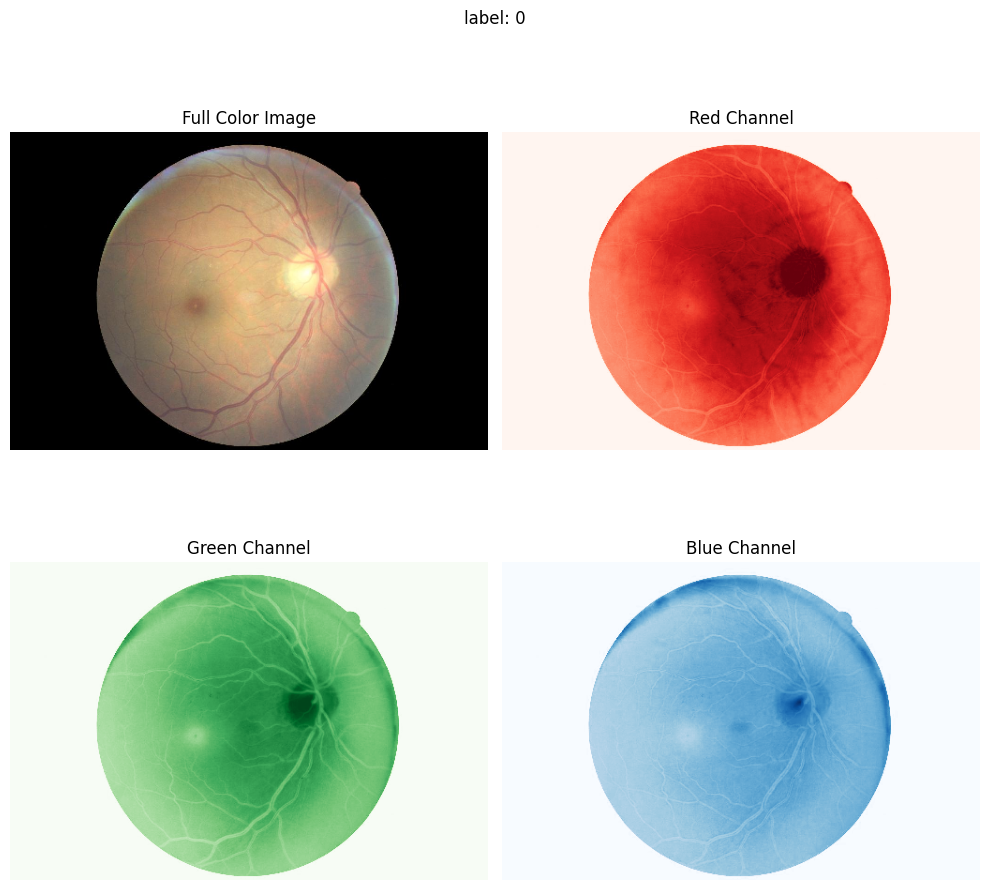

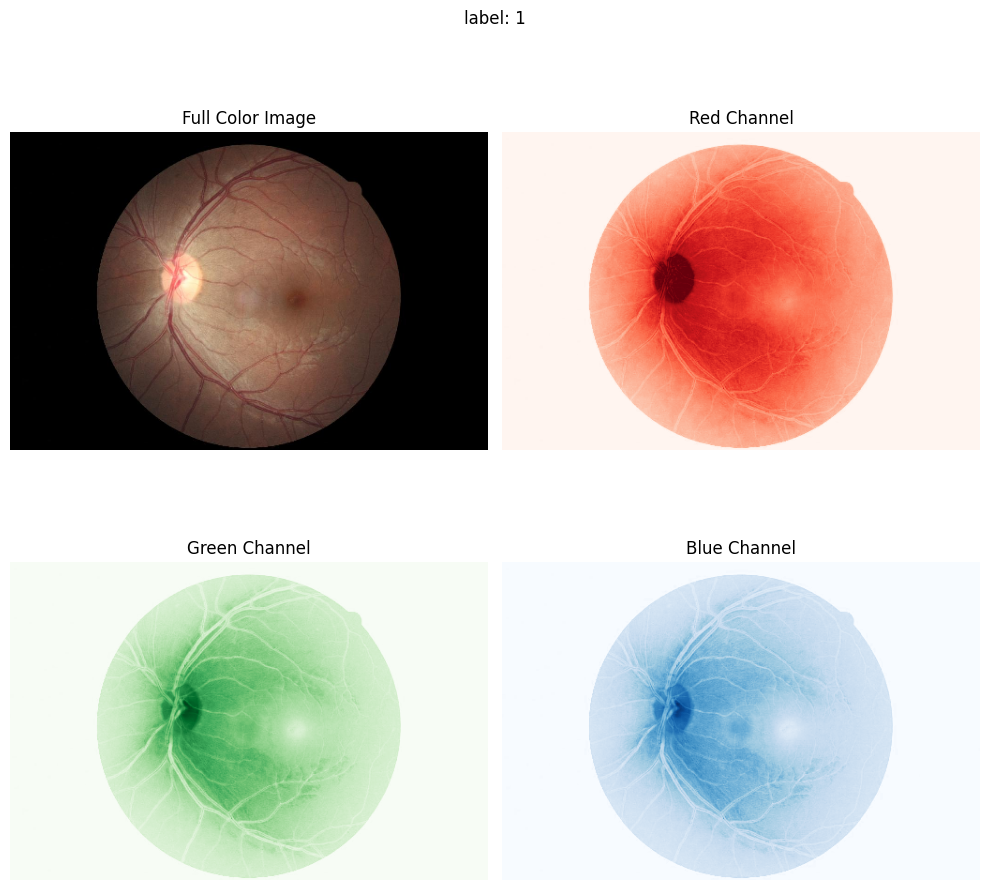

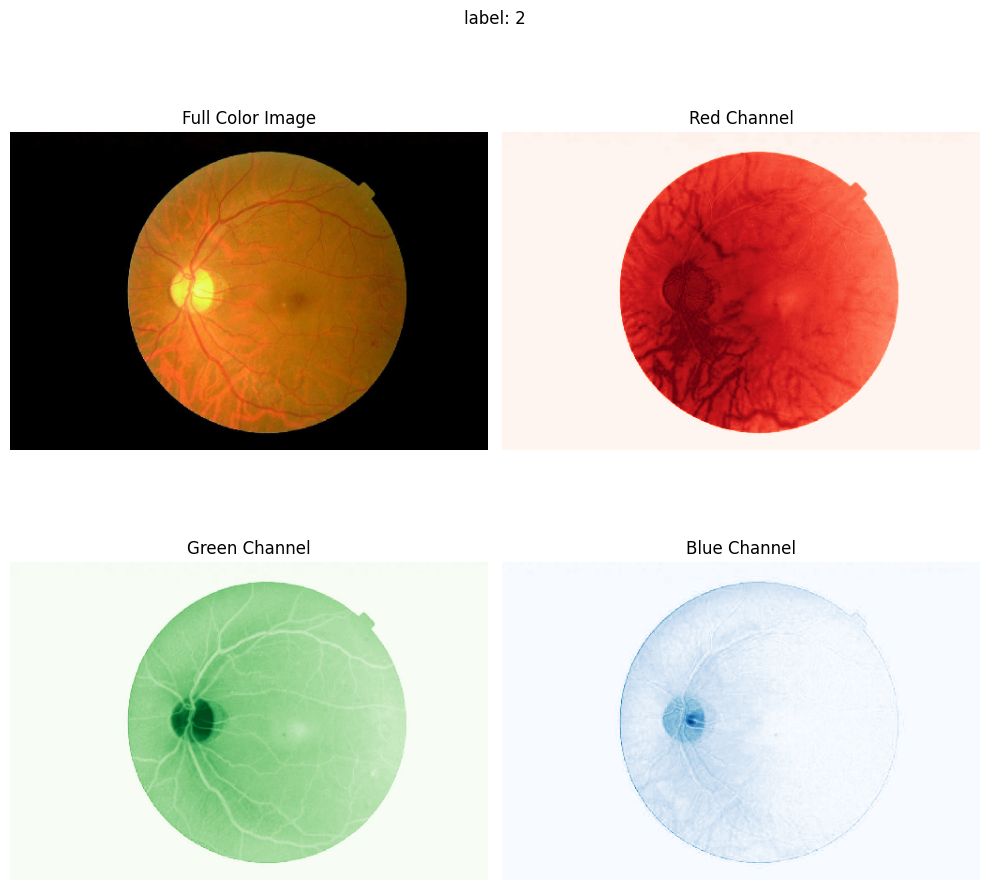

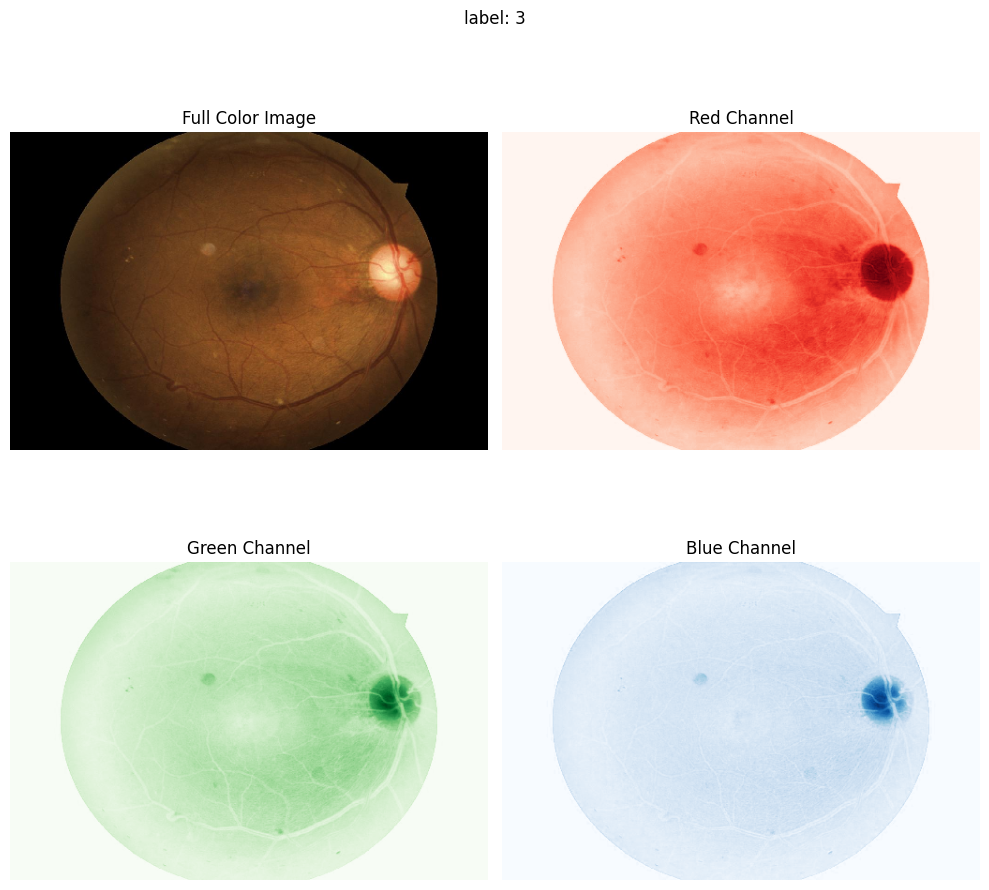

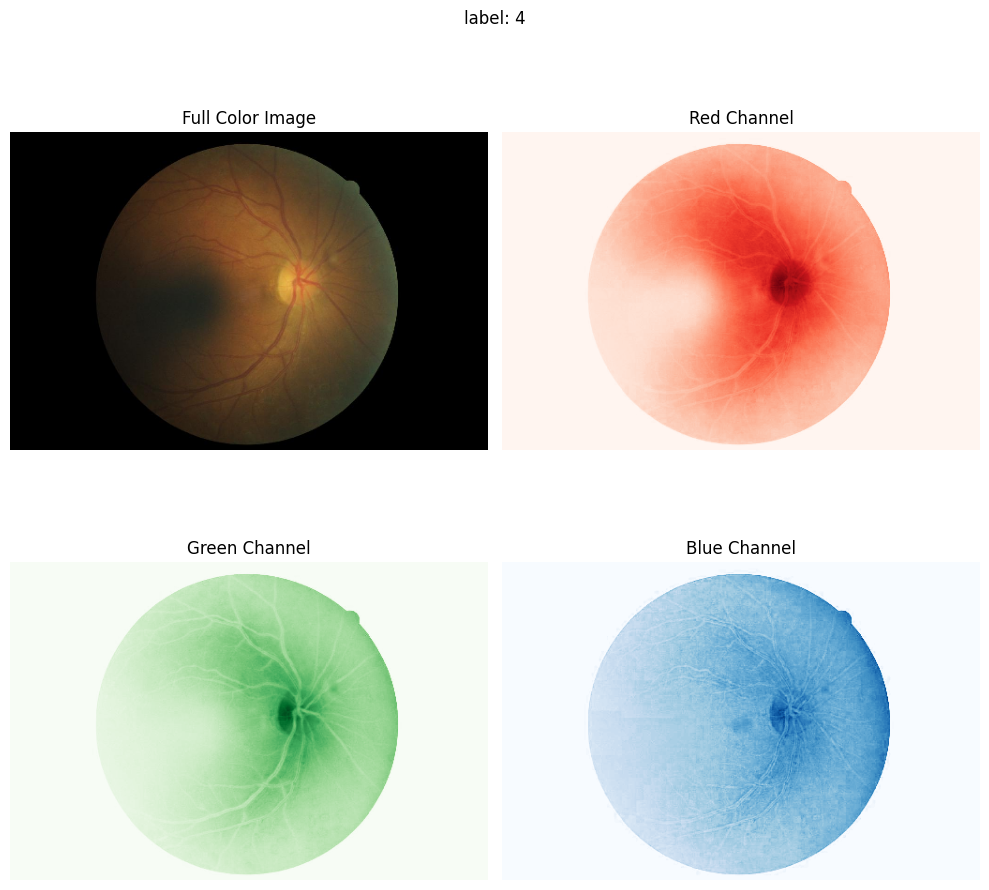

In [28]:
sample_list = sample_set()
label_list = [0,1,2,3,4]
for sample, label in zip(sample_list, label_list):
    show_color_and_channels(sample, label)

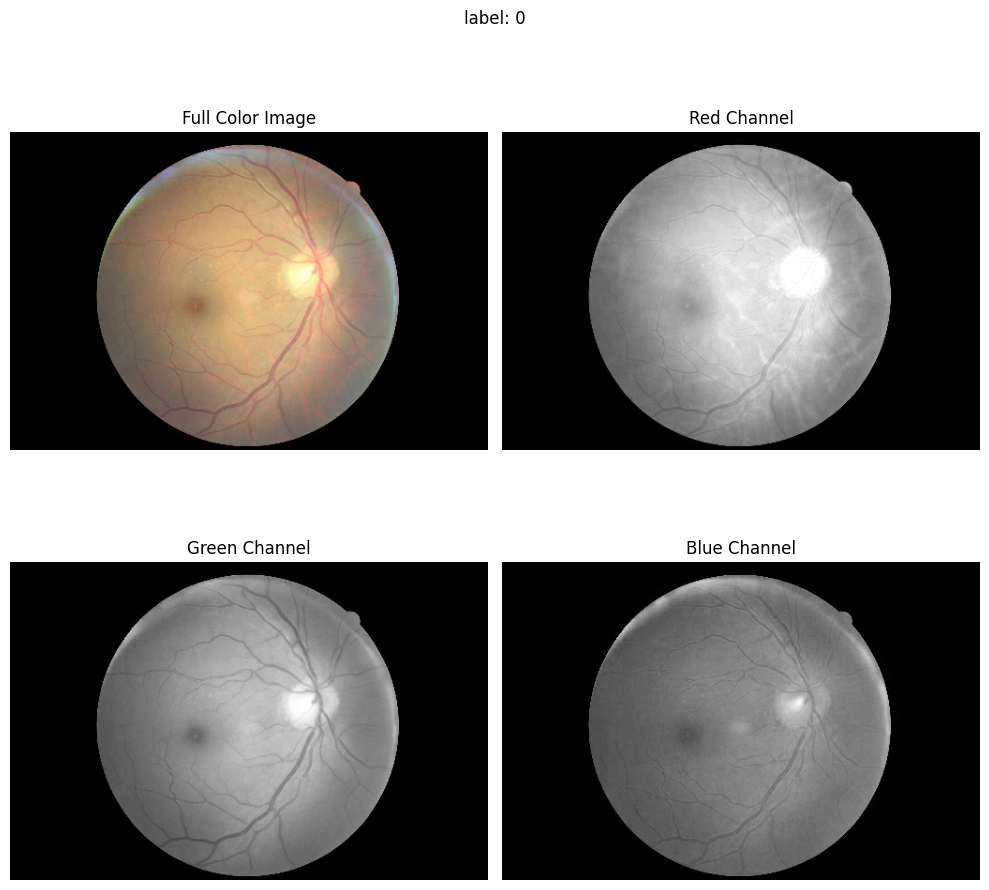

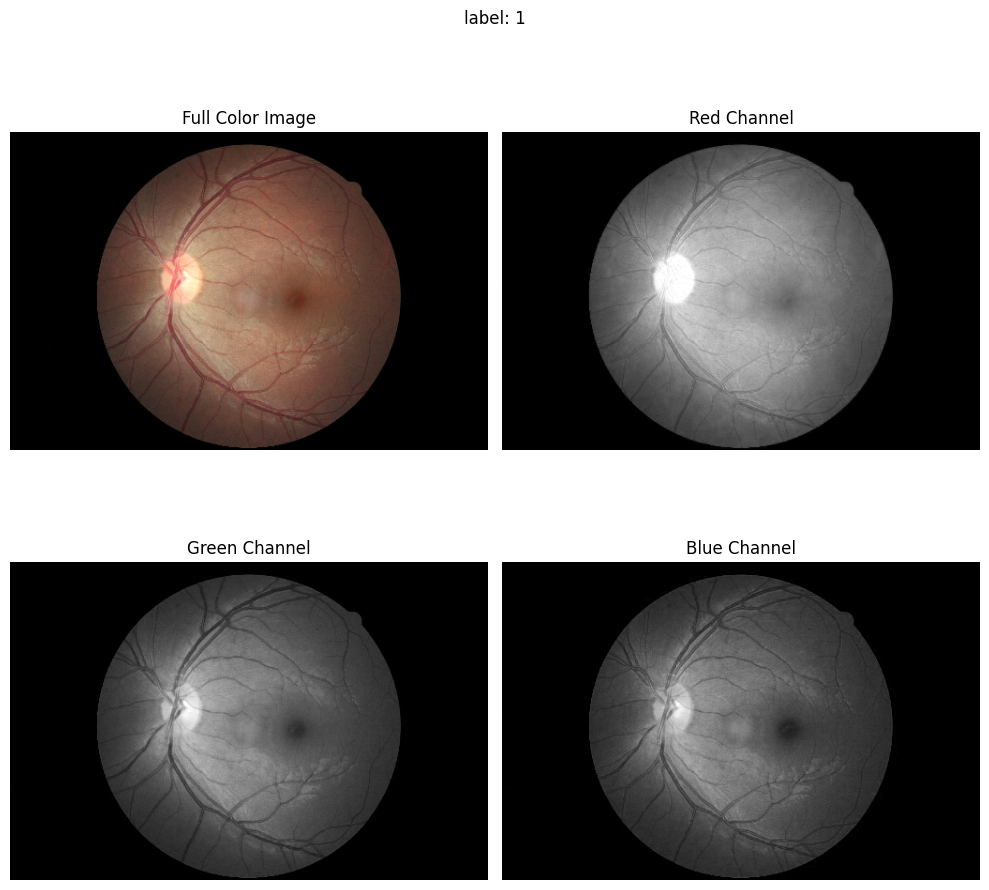

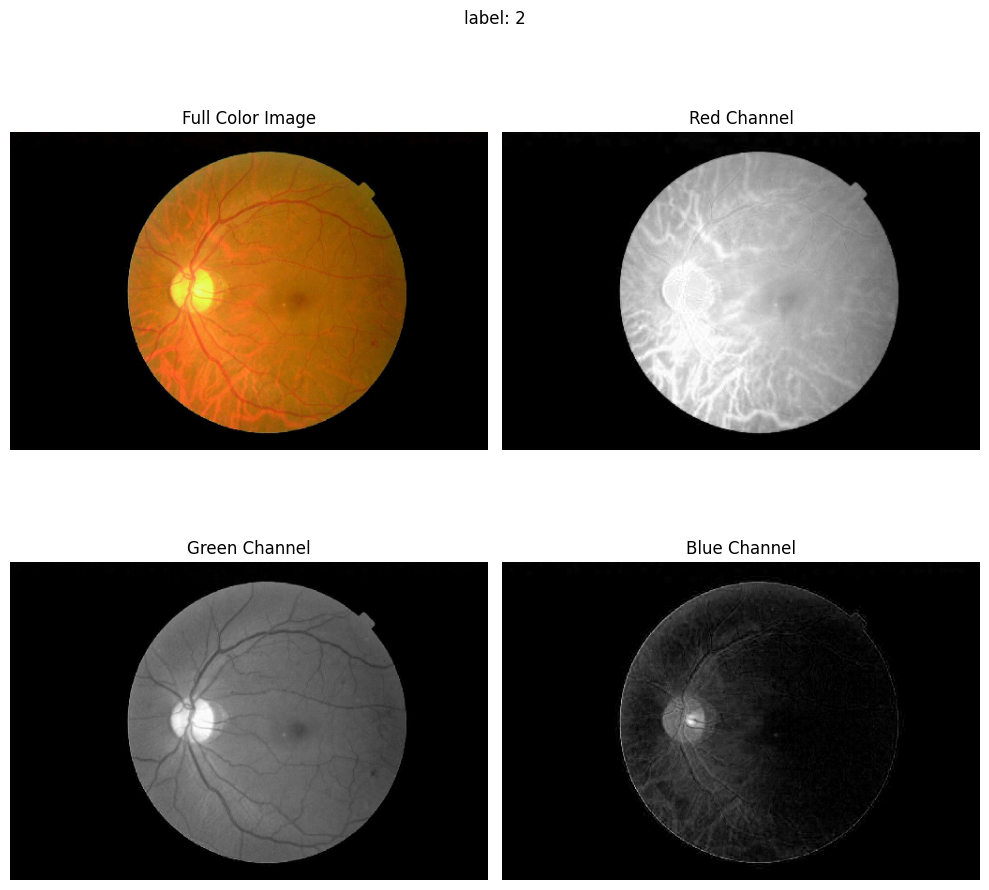

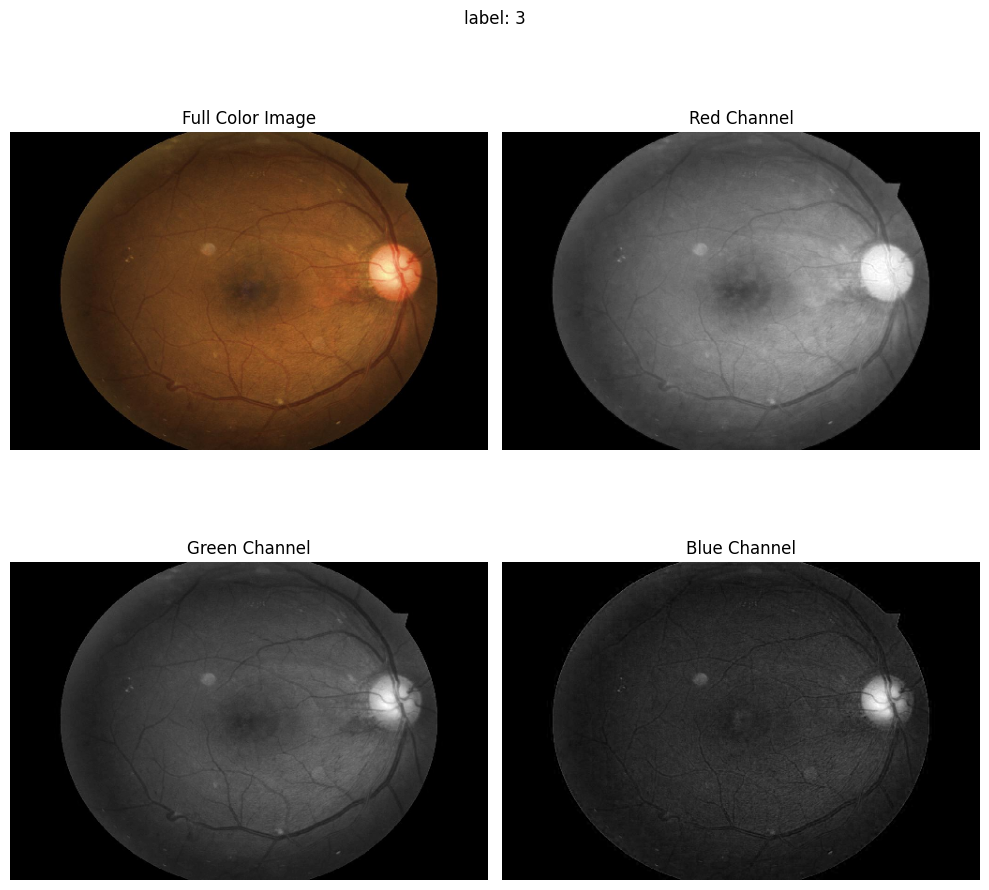

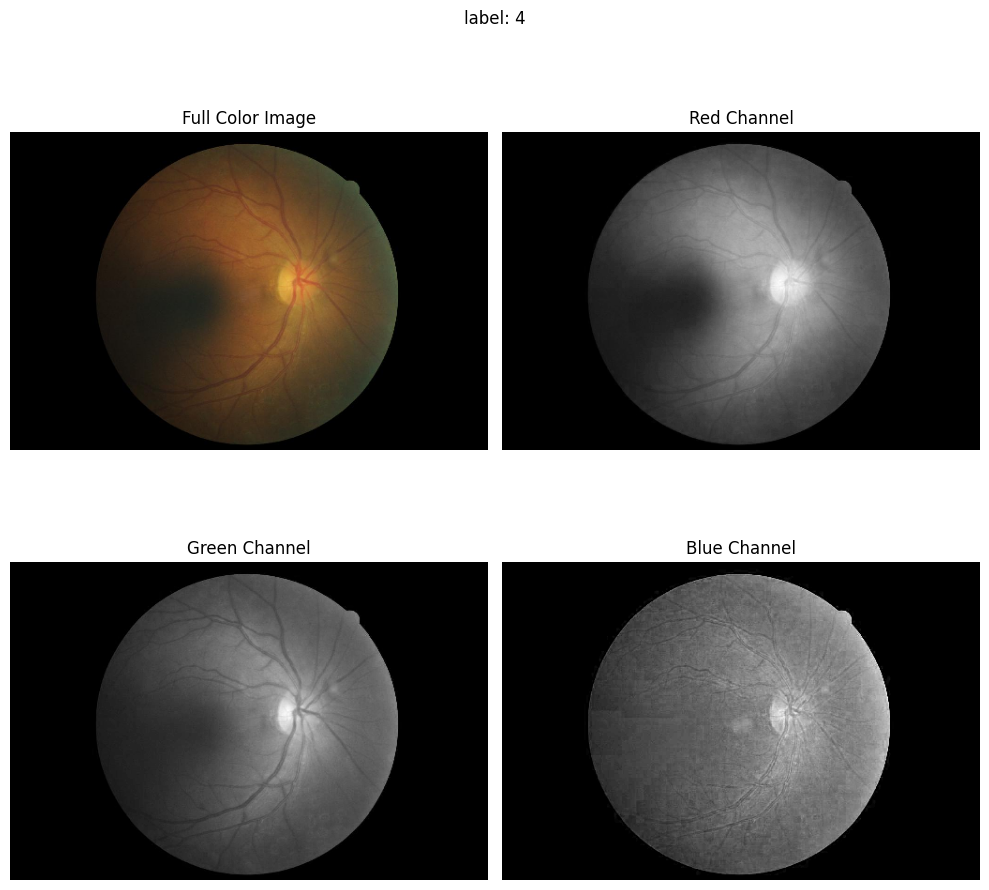

In [29]:
label_list = [0,1,2,3,4]
for sample, label in zip(sample_list, label_list):
    show_color_and_channels(sample, label, 1)

Through experiments, it was found that the green channel can better retain image features.

In [38]:
from PIL import Image

def save_GreenChannel_gray_with_generator(directory, output_directory, batch_size=32, target_size=(340, 510)):
    image_datagen = ImageDataGenerator(rescale=1/255.)

    image_generator = image_datagen.flow_from_directory(
        directory,
        target_size=target_size,
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False
    )

    for i, (batch, _) in enumerate(image_generator):
        for image, filename in zip(batch, image_generator.filenames[i * batch_size:(i + 1) * batch_size]):
            original_filename = os.path.basename(filename)

            # Extract the green channel of a one-hot encoded image
            green_channel = image[:, :, 1]

            # Construct a new filename with the original filename
            new_filename = f"{original_filename}"

            # Save grayscale channel image
            output_path = os.path.join(output_directory, new_filename)
            Image.fromarray((green_channel * 255).astype(np.uint8)).save(output_path)

In [39]:
dat_Gray_GreenChannel_directory = os.path.join(data_directory_reshaped, 'GreenChannel_Gray Data')

In [40]:
save_GreenChannel_gray_with_generator(data_directory_reshaped, dat_Gray_GreenChannel_directory)

Found 35127 images belonging to 6 classes.


KeyboardInterrupt: 

# Generate data set summary

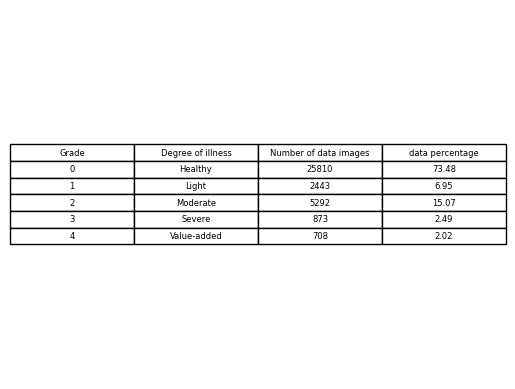

In [9]:
import pandas as pd

data = {'Grade': ['0', '1', '2', '3','4'],
        'Degree of illness': ['Healthy','Light','Moderate','Severe','Value-added'],
        'Number of data images': [25810,2443,5292,873,708]}

df = pd.DataFrame(data)

df['data percentage'] = (df['Number of data images']/df['Number of data images'].sum()) * 100
df['data percentage'] = df['data percentage'].round(2)

fig, ax = plt.subplots()
ax.axis('off')
ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')

plt.show()